In [3]:
import numpy as np
import matplotlib.image as img
import os

from matplotlib import pyplot as plt

images = {}
for filename in os.listdir('StarterFiles/Test1'):
    images[filename] = img.imread('StarterFiles/Test1/' + filename) 

    
col = 150
row = 130

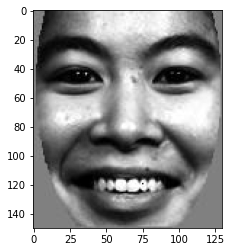

In [4]:
plt.imshow(images['00154fa010.940128.jpg'], ) #display the image 
plt.gray()  #grayscale conversion
plt.show()


In [5]:
# convert each to N^2 x 1 matrix

flattened = {}

for key in images:
    flattened[key] = images[key].flatten()

In [6]:
mean = np.zeros(len(flattened['00154fa010.940128.jpg']))
for key in flattened: 
    mean += flattened[key]

mean /= len(mean)

mean

array([0.29133333, 0.29225641, 0.294     , ..., 0.29148718, 0.29148718,
       0.29148718])

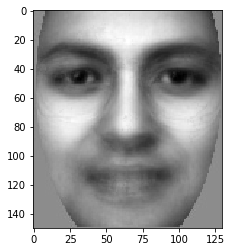

In [7]:
# just for fun, lets take a peek at the mean face :)

MEANFACE = mean.reshape(150, 130)
plt.imshow(MEANFACE, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

In [8]:
mean

array([0.29133333, 0.29225641, 0.294     , ..., 0.29148718, 0.29148718,
       0.29148718])

In [9]:
mean_adjusted = {}

for key in flattened: 
    mean_adjusted[key] = flattened[key] - mean


In [10]:
data = list(mean_adjusted.values())
data = [c.reshape(-1,1) for c in data]
a = np.column_stack(tuple(data))

covar = a @ a.T
covar

array([[730472.60517156, 732526.12900417, 736768.340688  , ...,
        730617.85914366, 730617.85914366, 730617.85914366],
       [732526.12900417, 735289.61964351, 739044.76862892, ...,
        732912.37744406, 732912.37744406, 732912.37744406],
       [736768.340688  , 739044.76862892, 744171.799184  , ...,
        737343.57867815, 737343.57867815, 737343.57867815],
       ...,
       [730617.85914366, 732912.37744406, 737343.57867815, ...,
        731022.11219373, 731022.11219373, 731022.11219373],
       [730617.85914366, 732912.37744406, 737343.57867815, ...,
        731022.11219373, 731022.11219373, 731022.11219373],
       [730617.85914366, 732912.37744406, 737343.57867815, ...,
        731022.11219373, 731022.11219373, 731022.11219373]])

In [13]:
covar2 = a.T @ a
covar2

array([[4.14752790e+08, 3.79098890e+08, 3.73139332e+08, ...,
        3.41246153e+08, 3.71899394e+08, 3.68650713e+08],
       [3.79098890e+08, 4.14503094e+08, 3.75097029e+08, ...,
        3.44585190e+08, 3.72629721e+08, 3.76433666e+08],
       [3.73139332e+08, 3.75097029e+08, 4.18624191e+08, ...,
        3.57609278e+08, 3.75887177e+08, 3.76168672e+08],
       ...,
       [3.41246153e+08, 3.44585190e+08, 3.57609278e+08, ...,
        4.17874008e+08, 3.48823630e+08, 3.68458126e+08],
       [3.71899394e+08, 3.72629721e+08, 3.75887177e+08, ...,
        3.48823630e+08, 4.15653507e+08, 3.83590384e+08],
       [3.68650713e+08, 3.76433666e+08, 3.76168672e+08, ...,
        3.68458126e+08, 3.83590384e+08, 4.17454630e+08]])

In [14]:
covar2_eigvals, covar2_eigvecs = np.linalg.eig(covar2)

In [15]:
covar_eigvecs = a @ covar2_eigvecs 
covar_eigvecs

array([[-8.54352603e+02,  4.31352909e+00,  1.23014769e+01, ...,
        -1.31277833e+00,  3.48927281e+00, -1.89596560e+00],
       [-8.57009579e+02,  4.87567371e+00,  1.57515220e+01, ...,
        -3.70605934e-01,  2.29404773e+00,  4.29632723e-01],
       [-8.62183456e+02,  1.18808992e+01,  1.12236702e+01, ...,
         5.33266863e+00, -4.16927314e+00, -3.75121504e+00],
       ...,
       [-8.54824354e+02,  5.12224938e+00,  1.14943446e+01, ...,
         2.82035385e-01,  2.44367718e-01, -1.77161544e-01],
       [-8.54824354e+02,  5.12224938e+00,  1.14943446e+01, ...,
         2.82035385e-01,  2.44367718e-01, -1.77161544e-01],
       [-8.54824354e+02,  5.12224938e+00,  1.14943446e+01, ...,
         2.82035385e-01,  2.44367718e-01, -1.77161544e-01]])

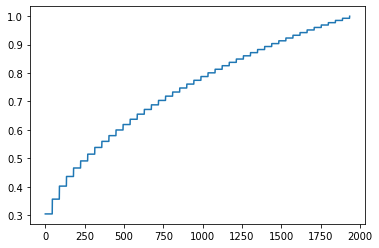

In [17]:
U,S,V = np.linalg.svd(a,full_matrices=False)
sigmas=np.diag(S)
plt.plot(np.cumsum(sigmas)/np.sum(sigmas))

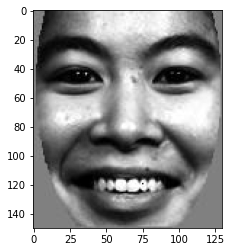

In [18]:
plt.imshow(images['00154fa010.940128.jpg'], ) #display the image 
plt.gray()  #grayscale conversion
plt.show()

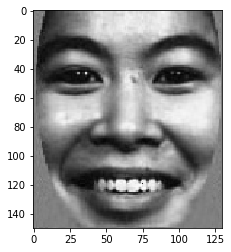

In [38]:
U,S,V = np.linalg.svd(images['00154fa010.940128.jpg'],full_matrices=False)
k = 30
new_image = np.dot(U[:,:k],np.dot(np.diag(S[:k]),V[:k,:]))
plt.imshow(new_image, interpolation='nearest')
plt.gray()  #grayscale conversion
plt.show()

In [39]:
normalized = covar_eigvecs.copy()
for i in range(0, 44):
    normalized[:,i] = normalized[:,i]/np.linalg.norm(normalized[:,i])
    
normalized

array([[-6.79843274e-03,  2.00654398e-04,  6.49283897e-04, ...,
        -3.27496164e-04,  8.58344923e-04, -4.69277419e-04],
       [-6.81957538e-03,  2.26803936e-04,  8.31380630e-04, ...,
        -9.24543156e-05,  5.64325099e-04,  1.06339975e-04],
       [-6.86074604e-03,  5.52669200e-04,  5.92396213e-04, ...,
         1.33033010e-03, -1.02562185e-03, -9.28477031e-04],
       ...,
       [-6.80218666e-03,  2.38274009e-04,  6.06682672e-04, ...,
         7.03587993e-05,  6.01133251e-05, -4.38499052e-05],
       [-6.80218666e-03,  2.38274009e-04,  6.06682672e-04, ...,
         7.03587993e-05,  6.01133251e-05, -4.38499052e-05],
       [-6.80218666e-03,  2.38274009e-04,  6.06682672e-04, ...,
         7.03587993e-05,  6.01133251e-05, -4.38499052e-05]])

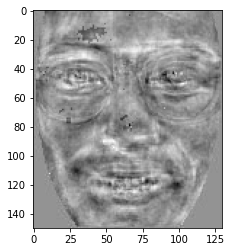

In [40]:
# lets take a peek at some of the eigenfaces 

eigenface = normalized[:,32].reshape(150,130)
plt.figure()
plt.imshow(eigenface,cmap='gray')

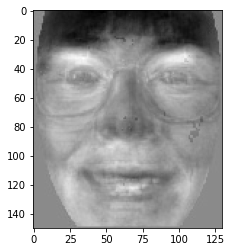

In [41]:
eigenface = normalized[:,2].reshape(150,130)
plt.figure()
plt.imshow(eigenface,cmap='gray')

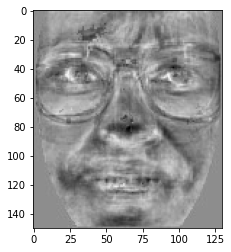

In [42]:
# cursed

eigenface = normalized[:,23].reshape(150,130)
plt.figure()
plt.imshow(eigenface,cmap='gray')

In [75]:
k_eigenfaces = normalized.copy()
k_eigenfaces = k_eigenfaces[:,0:k-1]
k_eigenfaces.shape

(19500, 29)

In [77]:
mean_adjusted['00154fa010.940128.jpg'].shape

(19500,)

In [79]:
test = list(mean_adjusted.values())
omega = k_eigenfaces.T @ test



ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 44 is different from 19500)